In [203]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
import wandb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


### `3.1 Data Processing and spliting dataset along with normaizign and standardizing`

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

<Axes: >

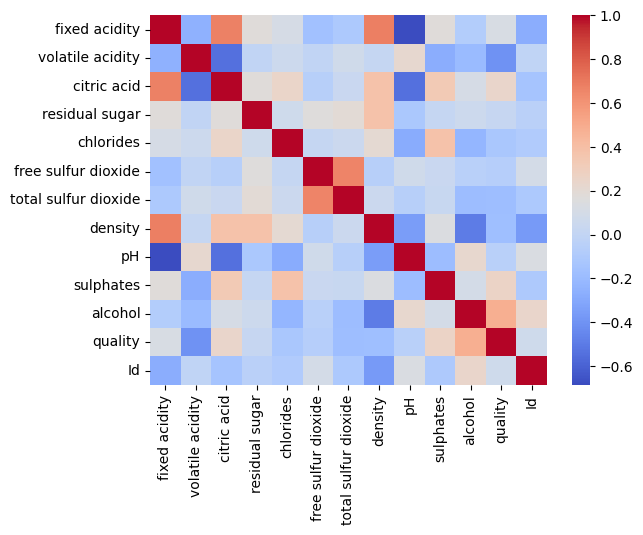

In [204]:
data = pd.read_csv('WineQT.csv')


print(data.describe())

cov_matrix = data.corr()
print(cov_matrix)
sns.heatmap(cov_matrix, cmap='coolwarm')

In [205]:
data = pd.read_csv('WineQT.csv')

labels = pd.DataFrame(data.quality-3)

data = data.drop(columns=['quality', 'Id'], axis=1)
imputer = KNNImputer(n_neighbors=2, weights="uniform")
data = imputer.fit_transform(data)

print(labels,data)

      quality
0           2
1           2
2           2
3           3
4           2
...       ...
1138        3
1139        3
1140        2
1141        3
1142        2

[1143 rows x 1 columns] [[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.2    0.6    0.08  ...  3.45   0.58  10.5  ]
 [ 5.9    0.55   0.1   ...  3.52   0.76  11.2  ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]]


In [206]:
def normalise(data):
    data = (data - data.min())/(data.max()-data.min())
    return data

In [207]:
def standardize(data):
    data = (data - data.mean())/data.std()
    return data

In [208]:
data = normalise(data) 
data = standardize(data)
print(data)

[[-0.03987803 -0.44427449 -0.48652486 ... -0.2746694  -0.45272456
   0.08083733]
 [-0.01573495 -0.4334101  -0.48652486 ... -0.29338028 -0.44548164
   0.10498041]
 [-0.01573495 -0.44065302 -0.48411055 ... -0.28975882 -0.44729237
   0.10498041]
 ...
 [-0.11230724 -0.45031025 -0.48169625 ... -0.27829086 -0.45151741
   0.14723078]
 [-0.13041455 -0.45332814 -0.48048909 ... -0.27406583 -0.44065302
   0.18948116]
 [-0.13041455 -0.44759416 -0.47928194 ... -0.27104794 -0.44367091
   0.12912348]]


In [209]:

# print(labels,data)
X_train , X_test , y_train , y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [210]:
print(y_train.sum())

quality    2428
dtype: int64


### `Implementation of MLP Classification class`

Built an MLP classifier class with the following specifications:
1. Created a class where you can modify and access the learning rate, activa-
tion function, optimisers, number of hidden layers and neurons.
2. Implemented methods for forward propagation, backpropagation, and train-
ing.
3. Different activation functions introduce non-linearity to the model and
affect the learning process. Implement the Sigmoid, Tanh, and ReLU
activation functions and make them easily interchangeable within your
MLP framework.
4. Optimization techniques dictate how the neural network updates its weights
during training. Implement methods for the Stochastic Gradient Descent
(SGD), Batch Gradient Descent, and Mini-Batch Gradient Descent algo-
rithms from scratch, ensuring that they can be employed within your MLP
architecture.


In [211]:
class Multi_layer_perceptron_gd():
    def __init__(self,data, labels,  hiddenLayers=[3], OutputLayer=6, learningRate = 0.001, activation = "sigmoid"):
        encoder = OneHotEncoder(sparse_output=False)
        self.labels = encoder.fit_transform(labels)
        # self.labels = labels
        self.data = data
        self.action = activation
        self.inputLayer = data.shape[1]
        self.learningRate = learningRate
        self.outputLayer = OutputLayer
        self.hiddenLayer = hiddenLayers
        print(self.inputLayer, self.outputLayer, self.hiddenLayer)
        #required number of weight vector's = hiddenLayers.size()+1
        self.we = [] 
        
        W1 = np.random.randn(self.inputLayer, self.hiddenLayer[0])
        self.we.append(W1)

        self.numberOfHiddenLayers = len(hiddenLayers)

        for i in range (1, self.numberOfHiddenLayers):
            W1 = np.random.randn(self.hiddenLayer[i-1], self.hiddenLayer[i])
            self.we.append(W1)

        W2 = np.random.randn(self.hiddenLayer[-1], self.outputLayer)
        self.we.append(W2)
        print(len(self.we))
        print(W1.shape,W2.shape)

    def activation(self,z):
        if(self.action == "sigmoid"):
            return 1/(1+np.exp(-z))
        if(self.action == "tanh"):
            return np.tanh(z)
        if(self.action == "Relu"):
            # return z*(z>0)
            return np.maximum(0,z)

    def derivative(self,z):
        if(self.action == "sigmoid"):
            return np.exp(-z)/((1+np.exp(-z))**2)
        if(self.action == "tanh"):
            return 1 - z**2
        if(self.action == "Relu"):
            # return 1*(z>0)
            return np.where(z>0 , 1 , 0)
    
    
    def soft_max_each(self,X):
        return np.exp(X) / np.sum(np.exp(X))
    
    def soft_max(self, pre_score):
   
        for i in range(len(pre_score)):
            pre_score[i] = self.soft_max_each(pre_score[i])
        return pre_score
    
    def forward(self,X):
        #number z's and a's will be self.numberOfHiddenLayers+1
        self.a = []
        self.z = []
        
        self.z.append( np.dot(X, self.we[0]) )
        self.a.append( self.activation(self.z[0] ))

        for i in range(1, self.numberOfHiddenLayers+1):
            self.z.append(  np.dot(self.a[i-1], self.we[i])  ) 
            self.a.append(  self.activation(self.z[i]) )

        return self.soft_max(self.a[-1])
    
    def backward(self, data_batch, labels_batch):
        djdw = []

        # Forward pass
        self.forward(data_batch)
        self.a[-1] = self.soft_max(self.a[-1])
        # Compute output layer error
        delta = np.multiply(-(labels_batch - self.a[-1]), self.derivative(self.z[-1]))

        # Backpropagation through hidden layers
        for i in range(self.numberOfHiddenLayers):
            curr_idx = self.numberOfHiddenLayers - i - 1
            jw = np.dot(self.a[curr_idx].T, delta)
            djdw.insert(0, jw)
            delta = np.dot(delta, self.we[curr_idx + 1].T) * self.derivative(self.z[curr_idx])

        # Compute the gradient for the input layer
        jw = np.dot(data_batch.T, delta)
        djdw.insert(0, jw)

        return djdw

    def gradient_descent(self, djdw):
        n = len(self.data)
        for i in range(len(self.we)):
            self.we[i] -= (self.learningRate) * djdw[i]

    def CELoss(self):
        #prediction set : self.a[-1]
        #label's : self.labels
        L = 0 # Define loss
        for i in range(self.a[-1].shape[0]): # Iterate through X
            L -= np.vdot( np.array(self.labels[i]),np.log(np.array(self.a[-1][i]))) # Cross Entropy Loss
        return L
        
    def fit(self, batch_size=0, num_epochs=20000):
        num_samples = len(self.data)

        for epoch in range(num_epochs):
            if batch_size == 0:  # Full Batch Gradient Descent
                data_batch, labels_batch = self.data, self.labels
                djdw = self.backward(data_batch, labels_batch)
                self.gradient_descent(djdw)
            else:  # Mini-Batch Gradient Descent or Stochastic Gradient Descent
                indices = np.arange(num_samples)
                np.random.shuffle(indices)

                for i in range(0, num_samples, batch_size):
                    batch_indices = indices[i:i + batch_size]
                    data_batch = self.data[batch_indices]
                    labels_batch = self.labels[batch_indices]
                    djdw = self.backward(data_batch, labels_batch)
                    self.gradient_descent(djdw)
            # print(self.a[-1].shape)      
            error = self.CELoss()
            wandb.log({"Learning_Rate": self.learningRate, "batch_size": batch_size})
            wandb.log({"CELoss": error})
            if(epoch%10 == 0):
                print("Epoch {}: Training Loss = {}".format(epoch, error))

            # output_labels = self.forward(self.data)
            # error = (((output_labels - self.labels) ** 2).sum())/2
    def predict(self, X):

        probs = self.forward(X)
        return np.argmax(probs, axis=1) 


In [212]:
# # obj = Multi_layer_perceptron(data = X_train , labels=y_train, hiddenLayers=[3], learningRate=0.0001, activation='sigmoid', OutputLayer=6)
# # # obj.forward(X_train)
# # # print(obj.a[-1].shape)
# # # print(obj.a[-1])
# # # obj.backward()
# # obj.fit()

# obj = Multi_layer_perceptron_gd(data = X_train , labels=y_train, hiddenLayers=[5,6,7], learningRate=0.06, activation='sigmoid', OutputLayer=6)
# obj.fit(num_epochs=100, batch_size=32)

# # Assuming y_true contains the true labels and y_pred contains the predicted labels
# # Make sure y_true and y_pred are of the same length
# y_true =  y_test.values.T[0]
# y_pred = obj.predict(X_test)

# accuracy = accuracy_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred, average='weighted')  # Use 'weighted' if you have multiple classes
# precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multiple classes
# recall = recall_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multiple classes

# print(f"Accuracy: {accuracy}")
# print(f"F1 Score: {f1}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")



In [213]:
#W&B part:
import wandb


wandb.init(project="SAMI-Ass-3-2", entity='aryamarda')

for learningRate in [0.005 , 0.001]:
    for hiddenLayers in [[6], [6,3], [6,5,7] ]:
            for batch_size in [0, 32, 50]:
                
                obj = Multi_layer_perceptron_gd(data = X_train , labels=y_train, hiddenLayers=hiddenLayers, learningRate=learningRate, activation='sigmoid', OutputLayer=6)
                obj.fit(num_epochs=2000, batch_size=batch_size)
                y_true =  y_test.values.T[0]
                y_pred = obj.predict(X_test)

                accuracy = accuracy_score(y_true, y_pred)
                f1 = f1_score(y_true, y_pred, average='weighted')  # Use 'weighted' if you have multiple classes
                precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multiple classes
                recall = recall_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multiple classes
                
                wandb.log({"Accuracy": accuracy})
                wandb.log({"F1 score": f1})
                wandb.log({"Precision": precision})
                wandb.log({"Recall": recall})
              
# obj.fit(num_epochs=15000)

Accuracy,▁█▁▁
CELoss,█████████▁▁▁▁▁▁▁▁▁████████▁▁▁▁▁▁▁▁▁▁████
F1 score,▄█▁▁
Learning_Rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Precision,▅█▁▁
Recall,▁█▁▁
batch_size,▁▁▁▁▁▁▁▁▁█████████▁▁▁▁▁▁▁▁██████████▁▁▁▁
Accuracy,0.41921
CELoss,30.68195
F1 score,0.24766
Learning_Rate,0.005


11 6 [6]
2
(11, 6) (6, 6)
Epoch 0: Training Loss = 1618.3273566984137
Epoch 10: Training Loss = 1566.4233843656345
Epoch 20: Training Loss = 1563.1690077063438
Epoch 30: Training Loss = 1562.1480853935743
Epoch 40: Training Loss = 1561.6459949441628
Epoch 50: Training Loss = 1561.3466870659229
Epoch 60: Training Loss = 1561.14778521245
Epoch 70: Training Loss = 1561.0060222336456
Epoch 80: Training Loss = 1560.8999307172774
Epoch 90: Training Loss = 1560.8176379999427
Epoch 100: Training Loss = 1560.7520398798142
Epoch 110: Training Loss = 1560.6986232462275
Epoch 120: Training Loss = 1560.6543829339691
Epoch 130: Training Loss = 1560.6172405588572
Epoch 140: Training Loss = 1560.5857132576468
Epoch 150: Training Loss = 1560.5587152924502
Epoch 160: Training Loss = 1560.5354342227618
Epoch 170: Training Loss = 1560.5152508718472
Epoch 180: Training Loss = 1560.4976860296736
Epoch 190: Training Loss = 1560.4823640340476
Epoch 200: Training Loss = 1560.4689873236114
Epoch 210: Training L

/home/arya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11 6 [6]
2
(11, 6) (6, 6)
Epoch 0: Training Loss = 32.16402781261048
Epoch 10: Training Loss = 30.920485579198534
Epoch 20: Training Loss = 30.799149435572897
Epoch 30: Training Loss = 30.77657604475292
Epoch 40: Training Loss = 30.752895367999415
Epoch 50: Training Loss = 30.756491930331496
Epoch 60: Training Loss = 30.7188607590752
Epoch 70: Training Loss = 30.706715469358635
Epoch 80: Training Loss = 30.71559184472193
Epoch 90: Training Loss = 30.701086449660195
Epoch 100: Training Loss = 30.703771431259458
Epoch 110: Training Loss = 30.705430828802065
Epoch 120: Training Loss = 30.69489067626112
Epoch 130: Training Loss = 30.68978303999126
Epoch 140: Training Loss = 30.703512932795537
Epoch 150: Training Loss = 30.690797188424856
Epoch 160: Training Loss = 30.694048943736743
Epoch 170: Training Loss = 30.69010748557584
Epoch 180: Training Loss = 30.69060223033717
Epoch 190: Training Loss = 30.69508813761336
Epoch 200: Training Loss = 30.690638801781365
Epoch 210: Training Loss = 30

/home/arya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11 6 [6]
2
(11, 6) (6, 6)
Epoch 0: Training Loss = 25.00304677702638
Epoch 10: Training Loss = 24.09695502947397
Epoch 20: Training Loss = 24.03032166189511
Epoch 30: Training Loss = 24.019413590967037
Epoch 40: Training Loss = 24.01286025241284
Epoch 50: Training Loss = 24.01164350273335
Epoch 60: Training Loss = 23.99891053586056
Epoch 70: Training Loss = 24.000404694097703
Epoch 80: Training Loss = 23.99958931797317
Epoch 90: Training Loss = 23.995176755944595
Epoch 100: Training Loss = 23.989925839864565
Epoch 110: Training Loss = 23.988558816340415
Epoch 120: Training Loss = 23.99035672318988
Epoch 130: Training Loss = 23.992123326455665
Epoch 140: Training Loss = 23.99243259304601
Epoch 150: Training Loss = 23.991226729826497
Epoch 160: Training Loss = 23.988015006242343
Epoch 170: Training Loss = 23.98946358009333
Epoch 180: Training Loss = 23.990785122509266
Epoch 190: Training Loss = 23.989583873779527
Epoch 200: Training Loss = 23.988217411985996
Epoch 210: Training Loss = 23

/home/arya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11 6 [6, 3]
3
(6, 3) (3, 6)
Epoch 0: Training Loss = 1649.3367682718333
Epoch 10: Training Loss = 1606.092267317214
Epoch 20: Training Loss = 1596.4043767236599
Epoch 30: Training Loss = 1580.760626871515
Epoch 40: Training Loss = 1572.1653411046866
Epoch 50: Training Loss = 1567.66106643094
Epoch 60: Training Loss = 1564.9950791265785
Epoch 70: Training Loss = 1563.571097033839
Epoch 80: Training Loss = 1562.7578746771865
Epoch 90: Training Loss = 1562.2455398160546
Epoch 100: Training Loss = 1561.895809812276
Epoch 110: Training Loss = 1561.642295763386
Epoch 120: Training Loss = 1561.4500599076782
Epoch 130: Training Loss = 1561.2991752326873
Epoch 140: Training Loss = 1561.177500476544
Epoch 150: Training Loss = 1561.0772301336228
Epoch 160: Training Loss = 1560.9931206484703
Epoch 170: Training Loss = 1560.9215189709928
Epoch 180: Training Loss = 1560.8598012875048
Epoch 190: Training Loss = 1560.806033646109
Epoch 200: Training Loss = 1560.758758605634
Epoch 210: Training Loss = 

/home/arya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11 6 [6, 3]
3
(6, 3) (3, 6)
Epoch 0: Training Loss = 31.95355421665968
Epoch 10: Training Loss = 30.995070363869118
Epoch 20: Training Loss = 30.806821858402152
Epoch 30: Training Loss = 30.759234972684038
Epoch 40: Training Loss = 30.73900352008674
Epoch 50: Training Loss = 30.726829561106623
Epoch 60: Training Loss = 30.719267027473325
Epoch 70: Training Loss = 30.71375767041542
Epoch 80: Training Loss = 30.70953693555089
Epoch 90: Training Loss = 30.70662768659862
Epoch 100: Training Loss = 30.7044984708775
Epoch 110: Training Loss = 30.7021376911319
Epoch 120: Training Loss = 30.70057361918582
Epoch 130: Training Loss = 30.69957540962609
Epoch 140: Training Loss = 30.697701790326512
Epoch 150: Training Loss = 30.696665601628094
Epoch 160: Training Loss = 30.695944386420216
Epoch 170: Training Loss = 30.695161702412612
Epoch 180: Training Loss = 30.694417683867997
Epoch 190: Training Loss = 30.693559140756243
Epoch 200: Training Loss = 30.692629558965674
Epoch 210: Training Loss = 3

/home/arya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11 6 [6, 3]
3
(6, 3) (3, 6)
Epoch 0: Training Loss = 24.900948821201254
Epoch 10: Training Loss = 24.172946186689487
Epoch 20: Training Loss = 24.07083132932765
Epoch 30: Training Loss = 24.04048431950799
Epoch 40: Training Loss = 24.02613487982595
Epoch 50: Training Loss = 24.017345106627392
Epoch 60: Training Loss = 24.012067428641718
Epoch 70: Training Loss = 24.008130609549376
Epoch 80: Training Loss = 24.005115018836776
Epoch 90: Training Loss = 24.00274252611286
Epoch 100: Training Loss = 24.00117227097984
Epoch 110: Training Loss = 23.99957852690908
Epoch 120: Training Loss = 23.998030915126773
Epoch 130: Training Loss = 23.99709143675588
Epoch 140: Training Loss = 23.99607150435024
Epoch 150: Training Loss = 23.995280898420333
Epoch 160: Training Loss = 23.99465667245607
Epoch 170: Training Loss = 23.993936767649284
Epoch 180: Training Loss = 23.993634187832743
Epoch 190: Training Loss = 23.993048474340807
Epoch 200: Training Loss = 23.99262581777466
Epoch 210: Training Loss = 

/home/arya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11 6 [6, 5, 7]
4
(5, 7) (7, 6)
Epoch 0: Training Loss = 1646.7074771254324
Epoch 10: Training Loss = 1569.116859819037
Epoch 20: Training Loss = 1563.687092753385
Epoch 30: Training Loss = 1562.2209445045237
Epoch 40: Training Loss = 1561.5714299692088
Epoch 50: Training Loss = 1561.2103893992894
Epoch 60: Training Loss = 1560.982075457717
Epoch 70: Training Loss = 1560.8252249391155
Epoch 80: Training Loss = 1560.71107879667
Epoch 90: Training Loss = 1560.6244162994549
Epoch 100: Training Loss = 1560.5564509952494
Epoch 110: Training Loss = 1560.5017654273317
Epoch 120: Training Loss = 1560.456842131994
Epoch 130: Training Loss = 1560.4193000853807
Epoch 140: Training Loss = 1560.3874712600318
Epoch 150: Training Loss = 1560.3601530238834
Epoch 160: Training Loss = 1560.3364568274167
Epoch 170: Training Loss = 1560.3157122139078
Epoch 180: Training Loss = 1560.297403942301
Epoch 190: Training Loss = 1560.281129638969
Epoch 200: Training Loss = 1560.266570572727
Epoch 210: Training Los

/home/arya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11 6 [6, 5, 7]
4
(5, 7) (7, 6)
Epoch 0: Training Loss = 32.554912468074015
Epoch 10: Training Loss = 31.015217630202947
Epoch 20: Training Loss = 30.806574244402793
Epoch 30: Training Loss = 30.749087791111425
Epoch 40: Training Loss = 30.724429838035363
Epoch 50: Training Loss = 30.713287453752116
Epoch 60: Training Loss = 30.70606740257217
Epoch 70: Training Loss = 30.701435869137537
Epoch 80: Training Loss = 30.69827861233061
Epoch 90: Training Loss = 30.69584532984575
Epoch 100: Training Loss = 30.694004202939755
Epoch 110: Training Loss = 30.692580935509966
Epoch 120: Training Loss = 30.691439454412357
Epoch 130: Training Loss = 30.69038264222001
Epoch 140: Training Loss = 30.689665919244906
Epoch 150: Training Loss = 30.68897443158898
Epoch 160: Training Loss = 30.688328599750132
Epoch 170: Training Loss = 30.687823793151818
Epoch 180: Training Loss = 30.687386825026763
Epoch 190: Training Loss = 30.686948918421148
Epoch 200: Training Loss = 30.686579841927713
Epoch 210: Training

/home/arya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11 6 [6, 5, 7]
4
(5, 7) (7, 6)
Epoch 0: Training Loss = 24.4806012205395
Epoch 10: Training Loss = 24.110222369638915
Epoch 20: Training Loss = 24.04258103285004
Epoch 30: Training Loss = 24.0205828442016
Epoch 40: Training Loss = 24.01034585251334
Epoch 50: Training Loss = 24.004428803338133
Epoch 60: Training Loss = 24.000093475964118
Epoch 70: Training Loss = 23.99815215829193
Epoch 80: Training Loss = 23.995966076091484
Epoch 90: Training Loss = 23.994332778686264
Epoch 100: Training Loss = 23.993040269810834
Epoch 110: Training Loss = 23.992164077512218
Epoch 120: Training Loss = 23.991672707455788
Epoch 130: Training Loss = 23.99076508621609
Epoch 140: Training Loss = 23.99037741536695
Epoch 150: Training Loss = 23.990021668590288
Epoch 160: Training Loss = 23.9893855305255
Epoch 170: Training Loss = 23.98913909979632
Epoch 180: Training Loss = 23.988835906079316
Epoch 190: Training Loss = 23.988518015027648
Epoch 200: Training Loss = 23.988389591934695
Epoch 210: Training Loss =

/home/arya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11 6 [6]
2
(11, 6) (6, 6)
Epoch 0: Training Loss = 1621.7634576753453
Epoch 10: Training Loss = 1599.124217806743
Epoch 20: Training Loss = 1582.5513483634659
Epoch 30: Training Loss = 1574.6289533944725
Epoch 40: Training Loss = 1570.6602412598959
Epoch 50: Training Loss = 1568.3696939376605
Epoch 60: Training Loss = 1566.8934727671403
Epoch 70: Training Loss = 1565.8648450592816
Epoch 80: Training Loss = 1565.1064342282796
Epoch 90: Training Loss = 1564.5231242226414
Epoch 100: Training Loss = 1564.059669211223
Epoch 110: Training Loss = 1563.6818948672058
Epoch 120: Training Loss = 1563.3675589138022
Epoch 130: Training Loss = 1563.1015655164397
Epoch 140: Training Loss = 1562.8733030999672
Epoch 150: Training Loss = 1562.6750873245064
Epoch 160: Training Loss = 1562.501211020394
Epoch 170: Training Loss = 1562.3473427669326
Epoch 180: Training Loss = 1562.2101336008936
Epoch 190: Training Loss = 1562.0869523132505
Epoch 200: Training Loss = 1561.9757027111511
Epoch 210: Training Lo

/home/arya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11 6 [6]
2
(11, 6) (6, 6)
Epoch 0: Training Loss = 32.01541988420611
Epoch 10: Training Loss = 31.79814421673139
Epoch 20: Training Loss = 31.577572918029585
Epoch 30: Training Loss = 31.39383304973608
Epoch 40: Training Loss = 31.310213401067333
Epoch 50: Training Loss = 31.245818796308416
Epoch 60: Training Loss = 31.201040600642365
Epoch 70: Training Loss = 31.178682668540574
Epoch 80: Training Loss = 31.16268870649545
Epoch 90: Training Loss = 31.14925279063954
Epoch 100: Training Loss = 31.13059162208029
Epoch 110: Training Loss = 31.12484933296793
Epoch 120: Training Loss = 31.116500934277024
Epoch 130: Training Loss = 31.10605769048081
Epoch 140: Training Loss = 31.099910092973353
Epoch 150: Training Loss = 31.093493407678636
Epoch 160: Training Loss = 31.09066514492013
Epoch 170: Training Loss = 31.083991450576992
Epoch 180: Training Loss = 31.079215784939567
Epoch 190: Training Loss = 31.07666677327015
Epoch 200: Training Loss = 31.07101378512319
Epoch 210: Training Loss = 31.

/home/arya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11 6 [6]
2
(11, 6) (6, 6)
Epoch 0: Training Loss = 25.24063372921671
Epoch 10: Training Loss = 24.752366135283022
Epoch 20: Training Loss = 24.362426453930247
Epoch 30: Training Loss = 24.278306690411654
Epoch 40: Training Loss = 24.191775793194015
Epoch 50: Training Loss = 24.154932338766535
Epoch 60: Training Loss = 24.123589521848885
Epoch 70: Training Loss = 24.096354497488694
Epoch 80: Training Loss = 24.061488583883158
Epoch 90: Training Loss = 24.06957435797346
Epoch 100: Training Loss = 24.063986543819126
Epoch 110: Training Loss = 24.041220057708124
Epoch 120: Training Loss = 24.046251719845255
Epoch 130: Training Loss = 24.03605369211873
Epoch 140: Training Loss = 24.02925027581021
Epoch 150: Training Loss = 24.028046705205384
Epoch 160: Training Loss = 24.016997531402566
Epoch 170: Training Loss = 24.0129284293151
Epoch 180: Training Loss = 24.02173087426787
Epoch 190: Training Loss = 24.018514336963268
Epoch 200: Training Loss = 24.017609212650562
Epoch 210: Training Loss =

/home/arya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11 6 [6, 3]
3
(6, 3) (3, 6)
Epoch 0: Training Loss = 1648.5277422333347
Epoch 10: Training Loss = 1638.829984776276
Epoch 20: Training Loss = 1629.783886803288
Epoch 30: Training Loss = 1620.6167147274816
Epoch 40: Training Loss = 1611.8026689168903
Epoch 50: Training Loss = 1604.3307990282703
Epoch 60: Training Loss = 1598.202200863554
Epoch 70: Training Loss = 1592.6466432844707
Epoch 80: Training Loss = 1587.6298026664213
Epoch 90: Training Loss = 1583.635370303432
Epoch 100: Training Loss = 1580.746134223758
Epoch 110: Training Loss = 1578.6494376259018
Epoch 120: Training Loss = 1577.025006087081
Epoch 130: Training Loss = 1575.6635272620567
Epoch 140: Training Loss = 1574.444131211677
Epoch 150: Training Loss = 1573.3010715097257
Epoch 160: Training Loss = 1572.203189997367
Epoch 170: Training Loss = 1571.142214232776
Epoch 180: Training Loss = 1570.1246198995036
Epoch 190: Training Loss = 1569.1643717816135
Epoch 200: Training Loss = 1568.2763132321013
Epoch 210: Training Loss =

/home/arya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11 6 [6, 3]
3
(6, 3) (3, 6)
Epoch 0: Training Loss = 32.62613826994531
Epoch 10: Training Loss = 32.31547811064368
Epoch 20: Training Loss = 32.05822066154412
Epoch 30: Training Loss = 31.738030039237085
Epoch 40: Training Loss = 31.37818706352431
Epoch 50: Training Loss = 31.164127914354754
Epoch 60: Training Loss = 31.009669594252813
Epoch 70: Training Loss = 30.932632326873435
Epoch 80: Training Loss = 30.875275903338473
Epoch 90: Training Loss = 30.841702084622053
Epoch 100: Training Loss = 30.814628887196605
Epoch 110: Training Loss = 30.797761832883726
Epoch 120: Training Loss = 30.78068243235546
Epoch 130: Training Loss = 30.774947403130287
Epoch 140: Training Loss = 30.759164323794835
Epoch 150: Training Loss = 30.75438229993483
Epoch 160: Training Loss = 30.748204509499526
Epoch 170: Training Loss = 30.74289057125391
Epoch 180: Training Loss = 30.738511479329315
Epoch 190: Training Loss = 30.732761608517976
Epoch 200: Training Loss = 30.730211679778005
Epoch 210: Training Loss

/home/arya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11 6 [6, 3]
3
(6, 3) (3, 6)
Epoch 0: Training Loss = 25.39589430306454
Epoch 10: Training Loss = 25.223473712095632
Epoch 20: Training Loss = 25.17315770889788
Epoch 30: Training Loss = 25.144953196593935
Epoch 40: Training Loss = 25.135988269427333
Epoch 50: Training Loss = 25.12190135835264
Epoch 60: Training Loss = 25.104986429988475
Epoch 70: Training Loss = 25.092520774715464
Epoch 80: Training Loss = 25.050468004789973
Epoch 90: Training Loss = 25.02361206909638
Epoch 100: Training Loss = 24.955077787947115
Epoch 110: Training Loss = 24.86053461533366
Epoch 120: Training Loss = 24.773172812990765
Epoch 130: Training Loss = 24.61723626997929
Epoch 140: Training Loss = 24.430647279045264
Epoch 150: Training Loss = 24.40238478432016
Epoch 160: Training Loss = 24.259016731990023
Epoch 170: Training Loss = 24.221099884778152
Epoch 180: Training Loss = 24.160267775975722
Epoch 190: Training Loss = 24.141711773511133
Epoch 200: Training Loss = 24.1202190498703
Epoch 210: Training Loss =

/home/arya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11 6 [6, 5, 7]
4
(5, 7) (7, 6)
Epoch 0: Training Loss = 1640.571489200948
Epoch 10: Training Loss = 1603.4793427656075
Epoch 20: Training Loss = 1584.9400932995134
Epoch 30: Training Loss = 1578.532399241379
Epoch 40: Training Loss = 1575.0838315726774
Epoch 50: Training Loss = 1572.3016597345731
Epoch 60: Training Loss = 1569.8123158662904
Epoch 70: Training Loss = 1567.7204571865698
Epoch 80: Training Loss = 1566.1175824304955
Epoch 90: Training Loss = 1564.9514345927137
Epoch 100: Training Loss = 1564.1094763478316
Epoch 110: Training Loss = 1563.4912392931724
Epoch 120: Training Loss = 1563.0254973343299
Epoch 130: Training Loss = 1562.6652116796135
Epoch 140: Training Loss = 1562.3796302613573
Epoch 150: Training Loss = 1562.1483662107753
Epoch 160: Training Loss = 1561.957593712325
Epoch 170: Training Loss = 1561.797699917261
Epoch 180: Training Loss = 1561.6618364565263
Epoch 190: Training Loss = 1561.5450124856188
Epoch 200: Training Loss = 1561.44351484405
Epoch 210: Training 

/home/arya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11 6 [6, 5, 7]
4
(5, 7) (7, 6)
Epoch 0: Training Loss = 31.747101304712103
Epoch 10: Training Loss = 31.231744875582752
Epoch 20: Training Loss = 31.028348492954805
Epoch 30: Training Loss = 30.93095911797921
Epoch 40: Training Loss = 30.872378769298166
Epoch 50: Training Loss = 30.8297943766216
Epoch 60: Training Loss = 30.807240062899588
Epoch 70: Training Loss = 30.787496851735717
Epoch 80: Training Loss = 30.770445586522076
Epoch 90: Training Loss = 30.75704162721575
Epoch 100: Training Loss = 30.7482436033766
Epoch 110: Training Loss = 30.743715898004208
Epoch 120: Training Loss = 30.736676412595905
Epoch 130: Training Loss = 30.730533750502705
Epoch 140: Training Loss = 30.72541516898238
Epoch 150: Training Loss = 30.723166312945043
Epoch 160: Training Loss = 30.719501024063938
Epoch 170: Training Loss = 30.71883456638845
Epoch 180: Training Loss = 30.71481399156758
Epoch 190: Training Loss = 30.713388784608767
Epoch 200: Training Loss = 30.71262212566198
Epoch 210: Training Loss

/home/arya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11 6 [6, 5, 7]
4
(5, 7) (7, 6)
Epoch 0: Training Loss = 24.612338073548916
Epoch 10: Training Loss = 24.312140099736297
Epoch 20: Training Loss = 24.166295514029276
Epoch 30: Training Loss = 24.108102563927538
Epoch 40: Training Loss = 24.07150185451202
Epoch 50: Training Loss = 24.05523357753568
Epoch 60: Training Loss = 24.048264929770163
Epoch 70: Training Loss = 24.03413504063707
Epoch 80: Training Loss = 24.027127028755395
Epoch 90: Training Loss = 24.021087575844476
Epoch 100: Training Loss = 24.01595088289985
Epoch 110: Training Loss = 24.01551589887577
Epoch 120: Training Loss = 24.011085829598592
Epoch 130: Training Loss = 24.009165524322047
Epoch 140: Training Loss = 24.008023103364987
Epoch 150: Training Loss = 24.00558696356827
Epoch 160: Training Loss = 24.00430927025148
Epoch 170: Training Loss = 24.00243782019823
Epoch 180: Training Loss = 24.00111970150091
Epoch 190: Training Loss = 23.999679719731336
Epoch 200: Training Loss = 24.000436172330758
Epoch 210: Training Los

/home/arya/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### `Section 2.4: Multi-Label Classification`
Modified for multi-class classification.


In [240]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer,OneHotEncoder
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data = pd.read_csv("advertisement.csv")
X = data.drop(columns=["labels"])
y = data["labels"].str.split().apply(lambda labels: labels if isinstance(labels, list) else [])  # Convert labels to lists

# MultiLableBinarizer encoding
mlb = MultiLabelBinarizer()

y = mlb.fit_transform(y)

# Perform one-hot encoding for categorical variables in X
categorical_columns = ['gender','education','city', 'occupation', 'most bought item' ] 
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_columns])
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_columns))

a = ['labels']
sorted_labels = [','.join(sorted(labels)) for labels in[x.split(' ') for x in data['labels']]]
data['labels'] = sorted_labels
# print(sorted_labels)

y_label = encoder.fit_transform(data[a])

#Normalize Data X_normalized = (X - X_min) / (X_max - X_min)
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(X_encoded), columns=X_encoded.columns)

#Standardize Data X_standardized = (X - X_mean) / X_std
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_normalized), columns=df_normalized.columns)

# First normalized the data and then standardized the data

X_train, X_test, y_train, y_test = train_test_split(df_standardized, y, test_size=0.2, random_state=42)
X_train_powerset, X_test_powerset, y_train_powerset, y_test_powerset = train_test_split(X_encoded, y_label, test_size=0.2, random_state=42)

In [255]:
class Multi_layer_perceptron_gd_mc():
    def __init__(self,data, labels,  hiddenLayers=[3], OutputLayer=8, learningRate = 0.001, activation = "sigmoid"):
        self.labels = labels
        # self.labels = labels
        self.data = data
        self.action = activation
        self.inputLayer = data.shape[1]
        self.learningRate = learningRate
        self.outputLayer = OutputLayer
        self.hiddenLayer = hiddenLayers
        # print(self.inputLayer, self.outputLayer, self.hiddenLayer)
        #required number of weight vector's = hiddenLayers.size()+1
        self.we = [] 
        
        W1 = np.random.randn(self.inputLayer, self.hiddenLayer[0])
        self.we.append(W1)

        self.numberOfHiddenLayers = len(hiddenLayers)

        for i in range (1, self.numberOfHiddenLayers):
            W1 = np.random.randn(self.hiddenLayer[i-1], self.hiddenLayer[i])
            self.we.append(W1)

        W2 = np.random.randn(self.hiddenLayer[-1], self.outputLayer)
        self.we.append(W2)
        # print(len(self.we))
        # print(W1.shape,W2.shape)

    def activation(self,z):
        if(self.action == "sigmoid"):
            return 1/(1+np.exp(-z))
        if(self.action == "tanh"):
            return np.tanh(z)
        if(self.action == "Relu"):
            # return z*(z>0)
            return np.maximum(0,z)
        
    def derivative(self,z):
        if(self.action == "sigmoid"):
            return np.exp(-z)/((1+np.exp(-z))**2)
        if(self.action == "tanh"):
            return 1 - z**2
        if(self.action == "Relu"):
            # return 1*(z>0)
            return np.where(z>0 , 1 , 0)
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def soft_max_each(self,X):
        return np.exp(X) / np.sum(np.exp(X))
    
    def soft_max(self, pre_score):
   
        for i in range(len(pre_score)):
            pre_score[i] = self.soft_max_each(pre_score[i])
        return pre_score
    
    def forward(self,X):
        #number z's and a's will be self.numberOfHiddenLayers+1
        self.a = []
        self.z = []
        
        self.z.append( np.dot(X, self.we[0]) )
        self.a.append( self.activation(self.z[0] ))

        for i in range(1, self.numberOfHiddenLayers+1):
            self.z.append(  np.dot(self.a[i-1], self.we[i])  ) 
            self.a.append(  self.activation(self.z[i]) )

        # return self.soft_max(self.a[-1])
    
    def backward(self, data_batch, labels_batch):
        djdw = []

        # Forward pass
        self.forward(data_batch)
        self.a[-1] = self.sigmoid(self.a[-1])
        # Compute output layer error
        delta = np.multiply(-(labels_batch - self.a[-1]), self.derivative(self.z[-1]))

        # Backpropagation through hidden layers
        for i in range(self.numberOfHiddenLayers):
            curr_idx = self.numberOfHiddenLayers - i - 1
            jw = np.dot(self.a[curr_idx].T, delta)
            djdw.insert(0, jw)
            delta = np.dot(delta, self.we[curr_idx + 1].T) * self.derivative(self.z[curr_idx])

        # Compute the gradient for the input layer
        jw = np.dot(data_batch.T, delta)
        djdw.insert(0, jw)

        return djdw

    def gradient_descent(self, djdw):
        n = len(self.data)
        for i in range(len(self.we)):
            self.we[i] -= (self.learningRate) * djdw[i]

    def CELoss(self):
        #prediction set : self.a[-1]
        #label's : self.labels
        L = 0 # Define loss
        for i in range(self.a[-1].shape[0]): # Iterate through X
            L -= np.vdot( np.array(self.labels[i]),np.log(np.array(self.a[-1][i]))) # Cross Entropy Loss
        return L
    

    def fit(self, batch_size=0, num_epochs=2000):
        num_samples = len(self.data)

        for epoch in range(num_epochs):
            if batch_size == 0:  # Full Batch Gradient Descent
                data_batch, labels_batch = self.data, self.labels
                djdw = self.backward(data_batch, labels_batch)
                self.gradient_descent(djdw)
            else:  # Mini-Batch Gradient Descent or Stochastic Gradient Descent
                indices = np.arange(num_samples)
                np.random.shuffle(indices)

                for i in range(0, num_samples, batch_size):
                    batch_indices = indices[i:i + batch_size]
                    data_batch = self.data[batch_indices]
                    labels_batch = self.labels[batch_indices]
                    djdw = self.backward(data_batch, labels_batch)
                    self.gradient_descent(djdw)

            error = self.CELoss()
            wandb.log({"Learning_Rate": self.learningRate, "batch_size": batch_size})
            wandb.log({"CELoss": error})
            if(epoch%10 == 0):
                print("Epoch {}: Training Loss = {}".format(epoch, error))

    def predict(self, X):
        self.forward(X)
        probs = self.sigmoid(self.a[-1])
        print(probs)
        output_matrix = np.where(probs <= 0.5, 0, 1)
        return output_matrix

In [257]:
from sklearn.metrics import hamming_loss

wandb.init(project="SAMI-Ass-3-2", entity='aryamarda')
X_train=np.array(X_train)
y_train=np.array(y_train)

for learningRate in [0.005 , 0.001]:
    for hiddenLayers in [[26], [8,4], [6,5,7] ]:
            for batch_size in [0, 32, 50]:
                
                obj = Multi_layer_perceptron_gd_mc(data = X_train , labels=y_train, hiddenLayers=hiddenLayers, learningRate=learningRate, activation='sigmoid', OutputLayer=8)
                obj.fit(num_epochs=3000, batch_size=batch_size)
                y_true =  y_test
                y_pred = obj.predict(X_test)

                accuracy=1-hamming_loss(np.array(y_pred),y_true)
                f1 = f1_score(y_true, y_pred, average='weighted')  # Use 'weighted' if you have multiple classes
                precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multiple classes
                recall = recall_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multiple classes
                
                wandb.log({"Accuracy": accuracy})
                wandb.log({"F1 score": f1})
                wandb.log({"Precision": precision})
                wandb.log({"Recall": recall})

Accuracy,▁▁▁▁▁▁▁▁
CELoss,███▇▇▁▁▁▁▁▁▁▁▁▁█████▁▁▁▁▁▁▁▁▁█████▁▁▁▁▁▁
F1 score,▁▁▁▁▁▁▁▁
Learning_Rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Precision,▁▁▁▁▁▁▁▁
Recall,▁▁▁▁▁▁▁▁
batch_size,▁▁▁▁▁▅▅▅▅▅█████▁▁▁▁▁▅▅▅▅▅████▁▁▁▁▁▅▅▅▅▅█
Accuracy,0.32937
CELoss,86.55185
F1 score,0.49651
Learning_Rate,0.005


Epoch 0: Training Loss = 1108.6240858002811
Epoch 10: Training Loss = 1466.6429176600964
Epoch 20: Training Loss = 1509.4843099193731
Epoch 30: Training Loss = 1518.2305695062107
Epoch 40: Training Loss = 1521.5447504050137
Epoch 50: Training Loss = 1522.9761600948723
Epoch 60: Training Loss = 1523.6096371831588
Epoch 70: Training Loss = 1523.6862144140366
Epoch 80: Training Loss = 1523.4125531020018
Epoch 90: Training Loss = 1522.9505799422575
Epoch 100: Training Loss = 1522.3544601191923
Epoch 110: Training Loss = 1521.6099617257244
Epoch 120: Training Loss = 1520.653329684424
Epoch 130: Training Loss = 1519.602938484244
Epoch 140: Training Loss = 1518.6664993408162
Epoch 150: Training Loss = 1517.648270459136
Epoch 160: Training Loss = 1516.4556120165262
Epoch 170: Training Loss = 1515.1135278046443
Epoch 180: Training Loss = 1513.689871992786
Epoch 190: Training Loss = 1512.251008042736
Epoch 200: Training Loss = 1510.8699476303766
Epoch 210: Training Loss = 1509.4966640032396
Epoc

KeyboardInterrupt: 

In [219]:

from sklearn.metrics import accuracy_score,hamming_loss
from sklearn.metrics import mean_squared_error
X_train=np.array(X_train)
y_train=np.array(y_train)
obj = Multi_layer_perceptron_gd_mc(data=X_train, labels=y_train,  hiddenLayers=[26], OutputLayer=8, learningRate =0.06, activation = "sigmoid")
obj.fit(num_epochs=1000, batch_size=32) 
predict=obj.predict(X_train)

print(predict)
print(y_train)


a=[[1,1,0],
   [1,1,0]]
b=[[1,0,0],
   [1,0,0]]
a=np.array(a)
b=np.array(b)
predict=np.array(predict)
y_train=np.array(y_train)
print(1-hamming_loss(predict,y_train))
# # loss=hamming_loss(predict,y_train)
# print(loss)

59.26737689965494
54.52552998295346
51.3716466532338
54.662978799918726
53.57163544230851
51.832546713361324
46.014441494629224
49.394151070591406
59.57226958545256
51.26156104487028
[[0.5        0.73105818 0.50000086 ... 0.73105666 0.5        0.50000001]
 [0.5        0.50002646 0.50431565 ... 0.5        0.5        0.5       ]
 [0.513393   0.5        0.50000276 ... 0.5        0.50001593 0.5       ]
 ...
 [0.73005022 0.5        0.5        ... 0.50000002 0.50000119 0.7310098 ]
 [0.50142964 0.50000105 0.50231466 ... 0.73103445 0.5        0.50000125]
 [0.73094705 0.5        0.5        ... 0.50081192 0.50000024 0.5       ]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 0 ... 1 1 1]]
[[0 1 0 ... 1 0 1]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 0]
 [1 1 0 ... 0 0 0]]
